# Simulation 1: All Hits no Misses

### Modeling Simulation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

In [2]:
# Function for bullets added (tripple tap, any magsize)
def tripletap (magsize):
    if magsize == 0:
        added = 0
        return added
    if magsize % 2 == 1:
        added = (magsize-1)/2
        return added
    else:
        added = (magsize/2)-1
        return added
        

In [77]:
# Simulation 1, perfect accuracy and counting shots function

# Create simulation 1 function
def sim1 (magsize):
    
    tt = 0
    mag = magsize
    count = 0
    count_viest = 0
    count_tt = 0
    if magsize == 5:
        reserves = 15
    else:
        reserves = 19-magsize

    # for i in range(0,mag,1): # trail through one mag of 6, until empty or manual reload
    while mag >0:
        if count_viest == 3:
            tt +=1 # triple tap counter
            if tt == 3: # if tripple tap occurs, bullet added from thin air
                count_tt += 1
                mag += 1
                tt=0
            mag = mag -1 # one shoot, one less bullet
            count += 1 # counter of shots
            if mag == 0:
                break
        if count_viest <3:
            tt +=1 # triple tap counter
            if tt == 3: # if tripple tap occurs, bullet added from thin air
                count_tt += 1
                mag += 1
                tt=0
            mag = mag -1 # one shoot, one less bullet
            count += 1 # counter of shots
            if mag == 0:
                break
            viest = random.random()
            if viest <= .1:
                count_viest += 1 # counter of viest
                vneed = magsize - mag # bullets needed for full clip
                if vneed <= reserves:
                    reserves = reserves - vneed # viest immediately reloads from reserves
                    mag = mag + vneed # refills mag
                else:
                    mag = mag + reserves # refills with remaining reserves

                for gg in range(0,7,1): # cooldown of viestinger of 7 seconds/ 7 shots
                    if mag == 0:
                        break
                    if mag != 0:
                        tt+=1
                        if tt == 3: # if tripple tap occurs during viestinger cool down
                            count_tt += 1
                            mag += 1
                            tt=0
                        mag = mag - 1 # subtracting bullet for a shot
                        count += 1 # counter of shots
                    

                
    
    if magsize == 7:
        # Empty list, if all bullets were used
        if reserves == 0:
            empty1_mag7.append(1)
        else:
            empty1_mag7.append(0)

        # Append viest, tripple tap, and shot counts
        viest_count1_mag7.append(count_viest)
        shot_count1_mag7.append(count)
        tt_count1_mag7.append(count_tt)
        
    if magsize == 6:
        # Empty list, if all bullets were used
        if reserves == 0:
            empty1_mag6.append(1)
        else:
            empty1_mag6.append(0)

        # Append viest, tripple tap, and shot counts
        viest_count1_mag6.append(count_viest)
        shot_count1_mag6.append(count)
        tt_count1_mag6.append(count_tt)
        
    if magsize == 5:
        if reserves == 0:
            empty1_mag5.append(1)
        else:
            empty1_mag5.append(0)

        # Append viest, tripple tap, and shot counts
        viest_count1_mag5.append(count_viest)
        shot_count1_mag5.append(count)
        tt_count1_mag5.append(count_tt)

In [78]:
# Simulation 1, perfect accuracy and counting shots using function

# Define list for simulation 1
# mag 7 
empty1_mag7 = []
viest_count1_mag7 = []
shot_count1_mag7 = []
tt_count1_mag7 = []

# mag 6
empty1_mag6 = []
viest_count1_mag6 = []
shot_count1_mag6 = []
tt_count1_mag6 = []

# mag 5
empty1_mag5 = []
viest_count1_mag5 = []
shot_count1_mag5 = []
tt_count1_mag5 = []

# Create 100000 trials for simulation 1

for destiny in range(0,100000,1):
    
    # Simulate mag 7
    sim1(7)

    # Simulate mag 6
    sim1(6)

    # Simulate mag 5
    sim1(5)

In [79]:
# Create df with sim1 data
dfs1 = pd.DataFrame()

# Empty mags
dfs1['empty_mag7'] = empty1_mag7
dfs1['empty_mag6'] = empty1_mag6
dfs1['empty_mag5'] = empty1_mag5

# Viest mags
dfs1['viest_mag7'] = viest_count1_mag7
dfs1['viest_mag6'] = viest_count1_mag6
dfs1['viest_mag5'] = viest_count1_mag5

# Shot mags
dfs1['shot_mag7'] = shot_count1_mag7
dfs1['shot_mag6'] = shot_count1_mag6
dfs1['shot_mag5'] = shot_count1_mag5

# Tripple tap mags
dfs1['tt_mag7'] = tt_count1_mag7
dfs1['tt_mag6'] = tt_count1_mag6
dfs1['tt_mag5'] = tt_count1_mag5

In [ ]:
# Save out df1 to reuse
dfs1.to_csv('C://Users//proje//Downloads//df3_Simulation1.csv', index=False, header=True)

### Analyzing Simulation 1

In [80]:
# Sum of every column
dfs1.sum()

# Median of every column
dfs1.median()

# Mean of every column
dfs1.mean()

empty_mag7     0.02035
empty_mag6     0.00000
empty_mag5     0.00000
viest_mag7     0.77214
viest_mag6     0.56119
viest_mag5     0.46641
shot_mag7     14.09042
shot_mag6     10.53851
shot_mag5      8.63772
tt_mag7        4.29186
tt_mag6        2.91953
tt_mag5        2.48833
dtype: float64

In [81]:
# Create long format dfs for each distribution plot to compare distributions
dfs1['trial'] = dfs1.index

sim1_empty = pd.melt(dfs1, id_vars=['trial'], value_vars=['empty_mag7','empty_mag6', 'empty_mag5'])
sim1_empty = sim1_empty.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim1_viest = pd.melt(dfs1, id_vars=['trial'], value_vars=['viest_mag7','viest_mag6', 'viest_mag5'])
sim1_viest = sim1_viest.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim1_shot = pd.melt(dfs1, id_vars=['trial'], value_vars=['shot_mag7','shot_mag6', 'shot_mag5'])
sim1_shot = sim1_shot.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim1_tt = pd.melt(dfs1, id_vars=['trial'], value_vars=['tt_mag7','tt_mag6', 'tt_mag5'])
sim1_tt = sim1_tt.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

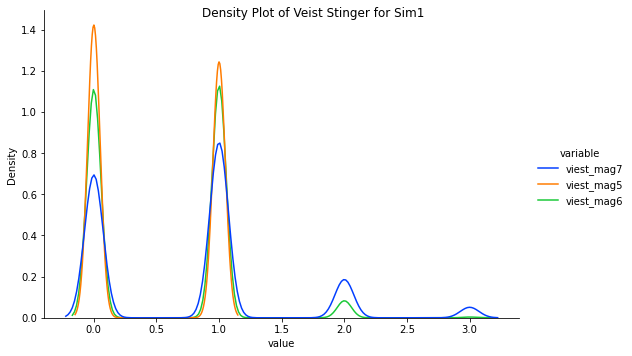

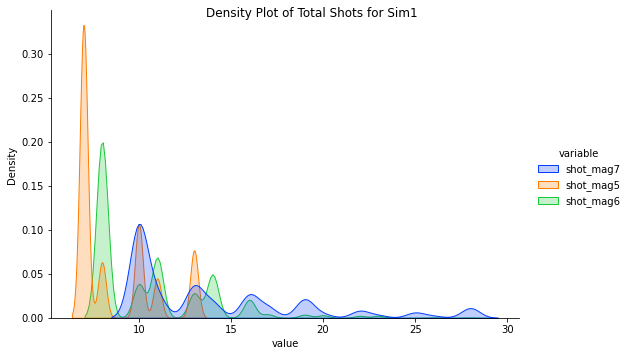

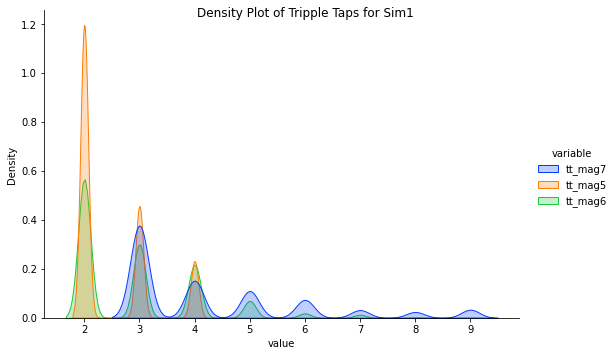

In [82]:
# Analyze distributions of variables

# Distribution of viestinger across mags sizes
ax1 = sns.displot(data=sim1_viest, x='value', hue='variable', kind='kde', 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax1.fig.suptitle("Density Plot of Veist Stinger for Sim1")
plt.show()

# Distribution of shots across mag sizes
ax2 = sns.displot(data=sim1_shot, x='value', hue='variable', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax2.fig.suptitle("Density Plot of Total Shots for Sim1")
plt.show()

# Distribution of tripple tap across mag sizes
ax3 = sns.displot(data=sim1_tt, x='value', hue='variable', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax3.fig.suptitle("Density Plot of Tripple Taps for Sim1")
plt.show()

In [151]:
# Counts of each variable 
pd.set_option('display.max_rows', 100)
sim1_empty.groupby(['variable', 'value']).count()

sim1_viest.groupby(['variable', 'value']).count()

sim1_shot.groupby(['variable', 'value']).count()

sim1_tt.groupby(['variable', 'value']).count()

trial
variable value       
tt_mag5  2      53297
         3      26063
         4      18897
         5        982
         6        761
tt_mag6  2      47639
         3      25466
         4      18321
         5       5748
         6       1613
         7       1073
         8         91
         9         49
tt_mag7  3      46878
         4      18882
         5      13744
         6       9490
         7       3997
         8       2960
         9       4016
         11        33

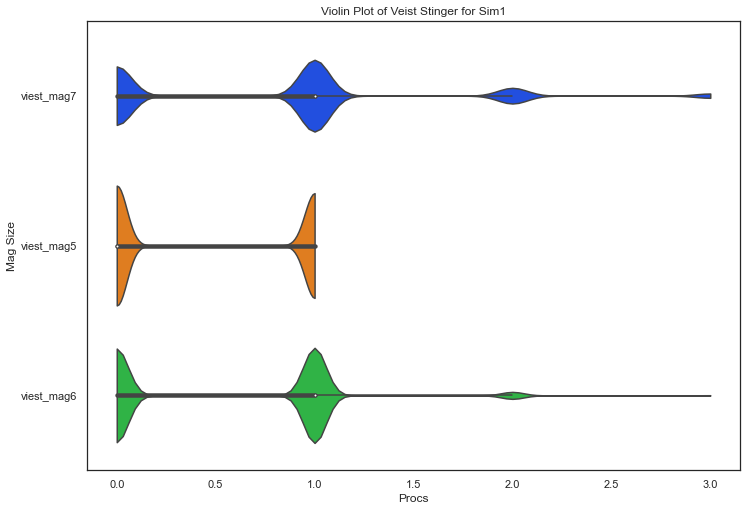

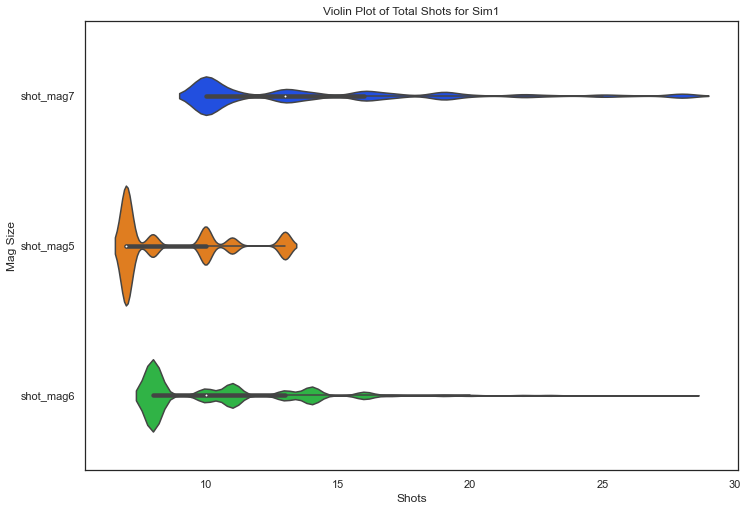

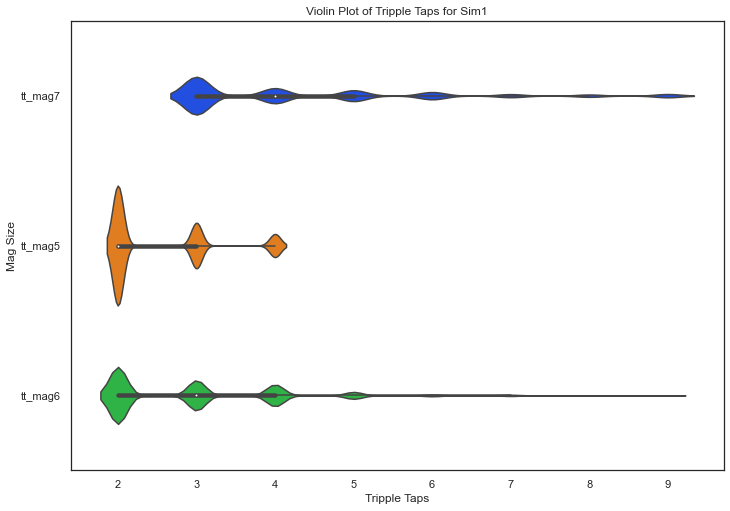

In [83]:
# Violin plots of each variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

plot1 = sns.violinplot(data=sim1_viest, x='value', y='variable', cut=0, palette=sns.color_palette('bright')[:3])
plot1.set_title('Violin Plot of Veist Stinger for Sim1')
plot1.set_ylabel('Mag Size')
plot1.set_xlabel('Procs')
plt.show()

plot2 = sns.violinplot(data=sim1_shot, x='value', y='variable', palette=sns.color_palette('bright')[:3])
plot2.set_title('Violin Plot of Total Shots for Sim1')
plot2.set_ylabel('Mag Size')
plot2.set_xlabel('Shots')
plt.show()

plot3 = sns.violinplot(data=sim1_tt, x='value', y='variable', palette=sns.color_palette('bright')[:3])
plot3.set_title('Violin Plot of Tripple Taps for Sim1')
plot3.set_ylabel('Mag Size')
plot3.set_xlabel('Tripple Taps')
plt.show()

In [85]:
# Create function for statistically significance
from scipy.stats import ttest_ind

def sig (var1, var2):
    if ttest_ind(var1, var2)[1] <= .05:
        # standard alpha of .05
        signif = 'and the results are statistically significant from zero, so we can reject the null hypothesis.'
    else:
        signif = 'and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.'
        
    print('The t-value', f'between {var1.name} and {var2.name} is:', round(ttest_ind(var1, var2)[0],2), signif)
    print('')

In [86]:
# t-test between distributions

# Viestinger mag 7, mag 6
sig(dfs1.viest_mag7, dfs1.viest_mag6)

# Viestinger mag 7, mag 5
sig(dfs1.viest_mag7, dfs1.viest_mag5)

# Viestinger mag 6, mag 5
sig(dfs1.viest_mag6, dfs1.viest_mag5)

# Tripple tap mag 7, mag 6
sig(dfs1.tt_mag7, dfs1.tt_mag6)

# Tripple tap mag 7, mag 5
sig(dfs1.tt_mag7, dfs1.tt_mag5)

# # Tripple tap mag 6, mag 5
sig(dfs1.tt_mag6, dfs1.tt_mag5)

The t-value between viest_mag7 and viest_mag6 is: 70.98 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between viest_mag7 and viest_mag5 is: 107.74 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between viest_mag6 and viest_mag5 is: 39.5 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between tt_mag7 and tt_mag6 is: 217.13 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between tt_mag7 and tt_mag5 is: 316.49 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between tt_mag6 and tt_mag5 is: 103.41 and the results are statistically significant from zero, so we can reject the null hypothesis.



# Simulation 2: Hit or Miss

In [87]:
# Simulation 2, perfect accuracy and counting shots function

# Create simulation 2 function
def sim2 (magsize):
    
    tt = 0
    mag = magsize
    count = 0
    count_viest = 0
    count_tt = 0
    count_miss = 0
    count_hit = 0
    if magsize == 5:
        reserves = 15
    else:
        reserves = 19 - magsize


    # for i in range(0,mag,1): # trail through one mag of 6, until empty or manual reload
    while mag >0:
        if count_viest < 3:
            hit = random.random()
            if hit <= .85: # Probability of a hit
                count_hit += 1 # counter of hits
                count_miss = 0

                tt +=1 # triple tap counter
                if tt == 3: # if tripple tap occurs, bullet added from thin air
                    count_tt += 1
                    mag += 1
                    tt=0
                mag = mag -1 # one shoot, one less bullet
                count += 1 # counter of shots
                if mag == 0:
                    break

                viest = random.random()
                if viest <= .1:
                    count_viest += 1 # counter of viest
                    vneed = magsize - mag # bullets needed for full clip
                    if vneed <= reserves:
                        reserves = reserves - vneed # viest immediately reloads from reserves
                        mag = mag + vneed # refills mag to 6
                    else:
                        mag = mag + reserves # refills with remaining reserves
                    for gg in range(0,7,1): # cooldown of viestinger of 7 seconds/ 7 shots
                        if mag == 0:
                            break
                        if mag != 0:
                            tt +=1
                            if tt == 3: # if tripple tap occurs during viestinger cool down
                                count_tt += 1
                                mag += 1
                                tt=0
                            mag = mag - 1 # subtracting bullet for a shot
                            count += 1 # counter of shots

                if hit > .85:
                    mag = mag -1 # one shoot, one less bullet
                    count += 1 # counter of shots
                    count_miss += 1 # counter of consecutive misses
                    if count_miss >= 2:
                        tt=0 # tripple tap reset, only allowed 1 miss
                    if mag == 0:
                            break
                        
        if count_viest == 3: 
            hit = random.random()
            if hit <= .85: # Probability of a hit
                count_hit += 1 # counter of hits
                count_miss = 0

                tt +=1 # triple tap counter
                if tt == 3: # if tripple tap occurs, bullet added from thin air
                    count_tt += 1
                    mag += 1
                    tt=0
                mag = mag -1 # one shoot, one less bullet
                count += 1 # counter of shots
                if mag == 0:
                    break
                    
            if hit > .85:
                    mag = mag -1 # one shoot, one less bullet
                    count += 1 # counter of shots
                    count_miss += 1 # counter of consecutive misses
                    if count_miss >= 2:
                        tt=0 # tripple tap reset, only allowed 1 miss
                    if mag == 0:
                            break

    if magsize == 7:
        # Empty list, if all bullets were used
        if reserves == 0:
            empty2_mag7.append(1)
        else:
            empty2_mag7.append(0)

        # Append viest, tripple tap, shot, and hit counts
        viest_count2_mag7.append(count_viest)
        shot_count2_mag7.append(count)
        tt_count2_mag7.append(count_tt)
        hit_count2_mag7.append(count_hit)
        
    if magsize == 6:
        # Empty list, if all bullets were used
        if reserves == 0:
            empty2_mag6.append(1)
        else:
            empty2_mag6.append(0)

        # Append viest, tripple tap, shot, and hit counts
        viest_count2_mag6.append(count_viest)
        shot_count2_mag6.append(count)
        tt_count2_mag6.append(count_tt)
        hit_count2_mag6.append(count_hit)
        
    if magsize == 5:
        # Empty list, if all bullets were used
        if reserves == 0:
            empty2_mag5.append(1)
        else:
            empty2_mag5.append(0)

        # Append viest, tripple tap, shot, and hit counts
        viest_count2_mag5.append(count_viest)
        shot_count2_mag5.append(count)
        tt_count2_mag5.append(count_tt)
        hit_count2_mag5.append(count_hit)

In [88]:
# Simulation 2, 85% accuracy and counting shots using function

# Define list for simulation 2
# mag 7 
empty2_mag7 = []
viest_count2_mag7 = []
shot_count2_mag7 = []
tt_count2_mag7 = []
hit_count2_mag7 = []

# mag 6
empty2_mag6 = []
viest_count2_mag6 = []
shot_count2_mag6 = []
tt_count2_mag6 = []
hit_count2_mag6 = []

# mag 5
empty2_mag5 = []
viest_count2_mag5 = []
shot_count2_mag5 = []
tt_count2_mag5 = []
hit_count2_mag5 = []

# Create 1000 trials for simulation 2

for destiny in range(0,100000,1):
    
    # Simulate mag 7
    sim2(7)

    # Simulate mag 6
    sim2(6)

    # Simulate mag 5
    sim2(5) 

In [89]:
dfs2 = pd.DataFrame()

# Empty mags
dfs2['empty_mag7'] = empty2_mag7
dfs2['empty_mag6'] = empty2_mag6
dfs2['empty_mag5'] = empty2_mag5

# Viest mags
dfs2['viest_mag7'] = viest_count2_mag7
dfs2['viest_mag6'] = viest_count2_mag6
dfs2['viest_mag5'] = viest_count2_mag5

# Shot mags
dfs2['shot_mag7'] = shot_count2_mag7
dfs2['shot_mag6'] = shot_count2_mag6
dfs2['shot_mag5'] = shot_count2_mag5

# Tripple tap mags
dfs2['tt_mag7'] = tt_count2_mag7
dfs2['tt_mag6'] = tt_count2_mag6
dfs2['tt_mag5'] = tt_count2_mag5

# Hit count mags
dfs2['hit_mag7'] = hit_count2_mag7
dfs2['hit_mag6'] = hit_count2_mag6
dfs2['hit_mag5'] = hit_count2_mag5

In [48]:
# Save out df2 to reuse
dfs2.to_csv('C://Users//proje//Downloads//df2_Simulation2.csv', index=False, header=True)

### Analyzing Simulation 2 

In [90]:
# Sum of every column
dfs2.sum()

# Median of every column
dfs2.median()

# Mean of every column
dfs2.mean()

empty_mag7     0.02053
empty_mag6     0.00000
empty_mag5     0.00000
viest_mag7     0.77326
viest_mag6     0.55643
viest_mag5     0.46744
shot_mag7     14.11715
shot_mag6     10.51977
shot_mag5      8.64509
tt_mag7        4.29298
tt_mag6        2.91210
tt_mag5        2.49087
hit_mag7       8.73939
hit_mag6       6.62458
hit_mag5       5.37301
dtype: float64

In [91]:
# Create long format dfs for each distribution plot to compare distributions
dfs2['trial'] = dfs2.index

sim2_empty = pd.melt(dfs2, id_vars=['trial'], value_vars=['empty_mag7','empty_mag6', 'empty_mag5'])
sim2_empty = sim2_empty.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim2_viest = pd.melt(dfs2, id_vars=['trial'], value_vars=['viest_mag7','viest_mag6', 'viest_mag5'])
sim2_viest = sim2_viest.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim2_shot = pd.melt(dfs2, id_vars=['trial'], value_vars=['shot_mag7','shot_mag6', 'shot_mag5'])
sim2_shot = sim2_shot.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim2_tt = pd.melt(dfs2, id_vars=['trial'], value_vars=['tt_mag7','tt_mag6', 'tt_mag5'])
sim2_tt = sim2_tt.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

sim2_hit = pd.melt(dfs2, id_vars=['trial'], value_vars=['hit_mag7','hit_mag6', 'hit_mag5'])
sim2_hit = sim2_hit.sort_values(by=['trial'], ascending=True).reset_index(drop=True)

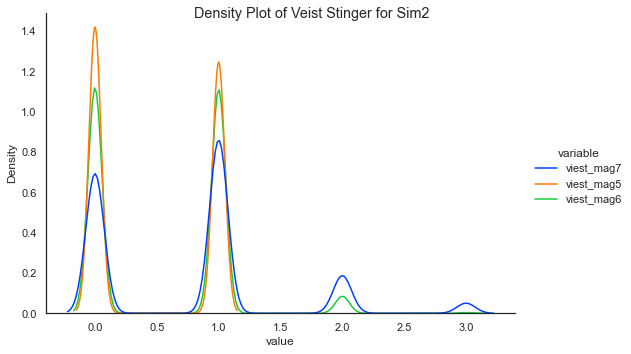

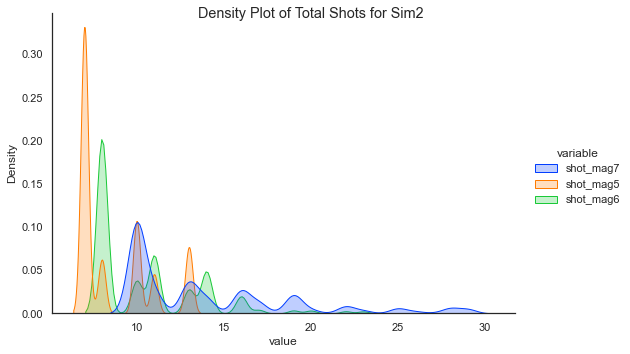

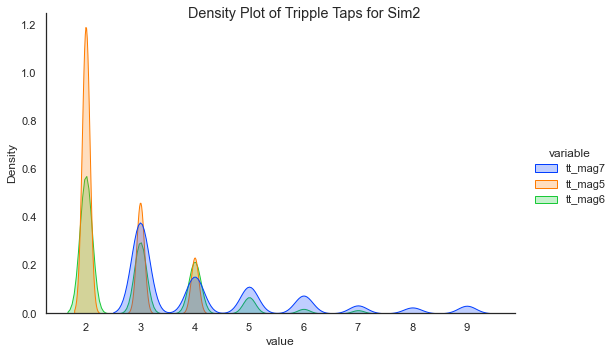

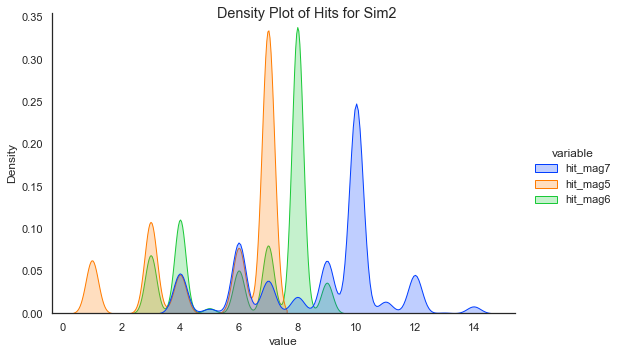

In [92]:
# Analyze distributions of variables

# Distribution of viestinger across mags sizes
ax1 = sns.displot(data=sim2_viest, x='value', hue='variable', kind='kde', 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax1.fig.suptitle("Density Plot of Veist Stinger for Sim2")
plt.show()

# Distribution of shots across mag sizes
ax2 = sns.displot(data=sim2_shot, x='value', hue='variable', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax2.fig.suptitle("Density Plot of Total Shots for Sim2")
plt.show()

# Distribution of tripple tap across mag sizes
ax3 = sns.displot(data=sim2_tt, x='value', hue='variable', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax3.fig.suptitle("Density Plot of Tripple Taps for Sim2")
plt.show()

# Distribution of hits across mag sizes
ax4 = sns.displot(data=sim2_hit, x='value', hue='variable', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
ax4.fig.suptitle("Density Plot of Hits for Sim2")
plt.show()

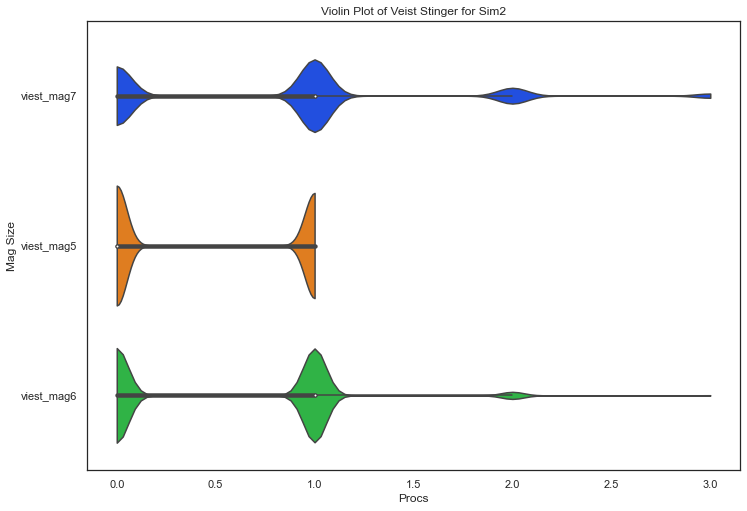

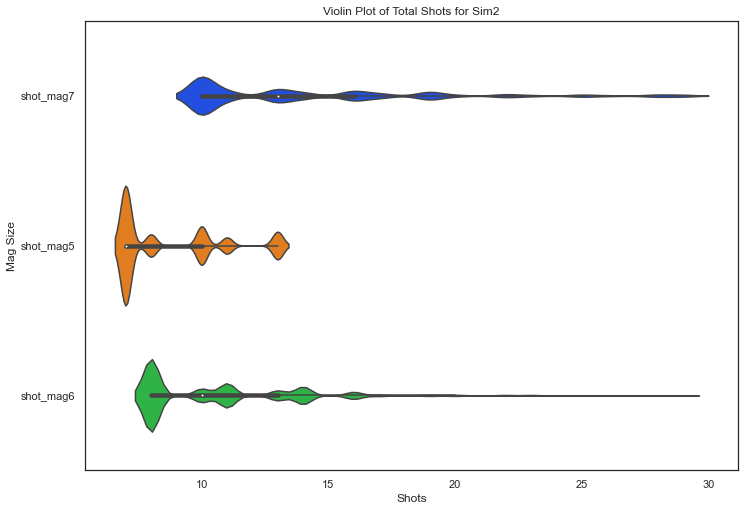

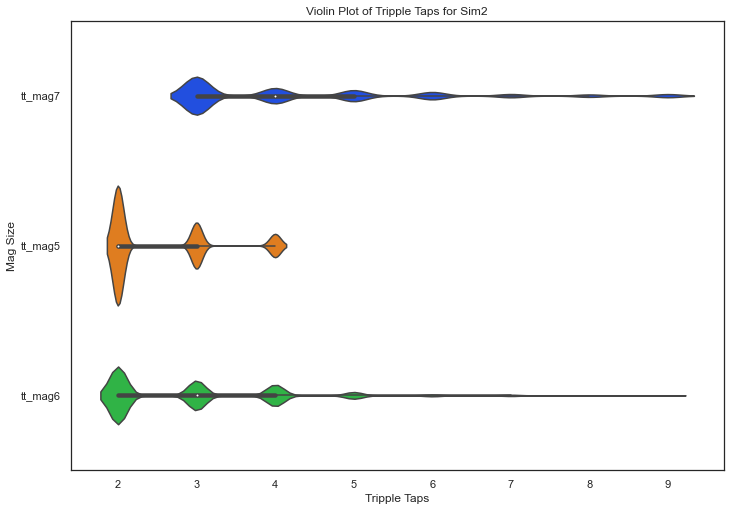

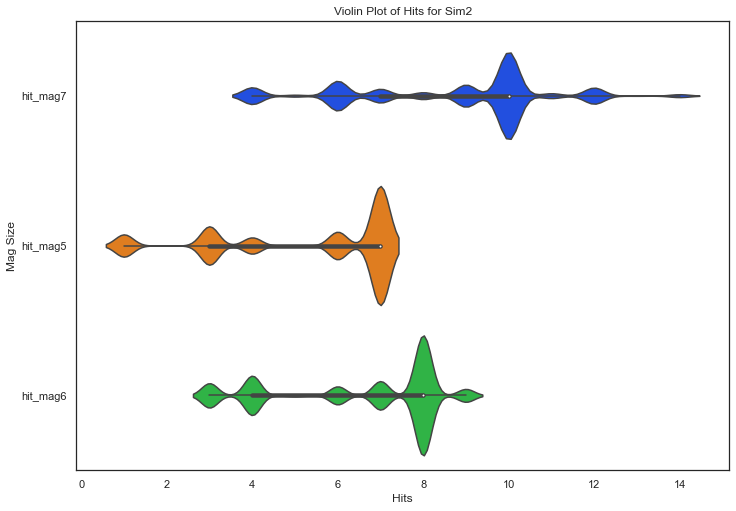

In [93]:
# Violin plots of each variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

plot1 = sns.violinplot(data=sim2_viest, x='value', y='variable', cut=0, palette=sns.color_palette('bright')[:3])
plot1.set_title('Violin Plot of Veist Stinger for Sim2')
plot1.set_ylabel('Mag Size')
plot1.set_xlabel('Procs')
plt.show()

plot2 = sns.violinplot(data=sim2_shot, x='value', y='variable', palette=sns.color_palette('bright')[:3])
plot2.set_title('Violin Plot of Total Shots for Sim2')
plot2.set_ylabel('Mag Size')
plot2.set_xlabel('Shots')
plt.show()

plot3 = sns.violinplot(data=sim2_tt, x='value', y='variable', palette=sns.color_palette('bright')[:3])
plot3.set_title('Violin Plot of Tripple Taps for Sim2')
plot3.set_ylabel('Mag Size')
plot3.set_xlabel('Tripple Taps')
plt.show()

plot4 = sns.violinplot(data=sim2_hit, x='value', y='variable', palette=sns.color_palette('bright')[:3])
plot4.set_title('Violin Plot of Hits for Sim2')
plot4.set_ylabel('Mag Size')
plot4.set_xlabel('Hits')
plt.show()

In [96]:
dfs2[dfs2['shot_mag7']>29]

,empty_mag7,empty_mag6,empty_mag5,viest_mag7,viest_mag6,viest_mag5,shot_mag7,shot_mag6,shot_mag5,tt_mag7,tt_mag6,tt_mag5,hit_mag7,hit_mag6,hit_mag5,trial


In [97]:
# t-test between distributions

# Viestinger mag 7, mag 6
sig(dfs2.viest_mag7, dfs2.viest_mag6)

# Viestinger mag 7, mag 5
sig(dfs2.viest_mag7, dfs2.viest_mag5)

# Viestinger mag 6, mag 5
sig(dfs2.viest_mag6, dfs2.viest_mag5)

# Tripple tap mag 7, mag 6
sig(dfs2.tt_mag7, dfs2.tt_mag6)

# Tripple tap mag 7, mag 5
sig(dfs2.tt_mag7, dfs2.tt_mag5)

# # Tripple tap mag 6, mag 5
sig(dfs2.tt_mag6, dfs2.tt_mag5)

The t-value between viest_mag7 and viest_mag6 is: 73.04 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between viest_mag7 and viest_mag5 is: 108.03 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between viest_mag6 and viest_mag5 is: 37.02 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between tt_mag7 and tt_mag6 is: 219.03 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between tt_mag7 and tt_mag5 is: 317.49 and the results are statistically significant from zero, so we can reject the null hypothesis.

The t-value between tt_mag6 and tt_mag5 is: 100.83 and the results are statistically significant from zero, so we can reject the null hypothesis.



In [98]:
# t-test between simulations

# Viestinger mag 7
sig(dfs1.viest_mag7, dfs2.viest_mag7)

# Viestinger mag 6
sig(dfs1.viest_mag6, dfs2.viest_mag6)

# Viestinger mag 5
sig(dfs1.viest_mag5, dfs2.viest_mag5)

# Tripple tap mag 7
sig(dfs1.tt_mag7, dfs2.tt_mag7)

# Tripple tap mag 6
sig(dfs1.tt_mag6, dfs2.tt_mag6)

# # Tripple tap mag 5
sig(dfs1.tt_mag5, dfs2.tt_mag5)

The t-value between viest_mag7 and viest_mag7 is: -0.34 and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.

The t-value between viest_mag6 and viest_mag6 is: 1.86 and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.

The t-value between viest_mag5 and viest_mag5 is: -0.46 and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.

The t-value between tt_mag7 and tt_mag7 is: -0.15 and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.

The t-value between tt_mag6 and tt_mag6 is: 1.49 and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.

The t-value between tt_mag5 and tt_mag5 is: -0.81 and the results are not statistically signifcant from zero, so we cannot reject the null hypothesis.

